In [20]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import numpy.linalg as linearAlgebra
import seaborn as sn
import pandas as pd
import os

In [21]:
def plotit(x,y,z,cmap_val):
    plt.subplot(x,y,z)
    plt.imshow(img, cmap=cmap_val)
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')

In [22]:
dataset_path = 'dataset/'
training_path= 'dataset/training/'
test_image_path= 'dataset/test/'
#height and width of image.
height = 112
width  = 92



Images will be trained here
60


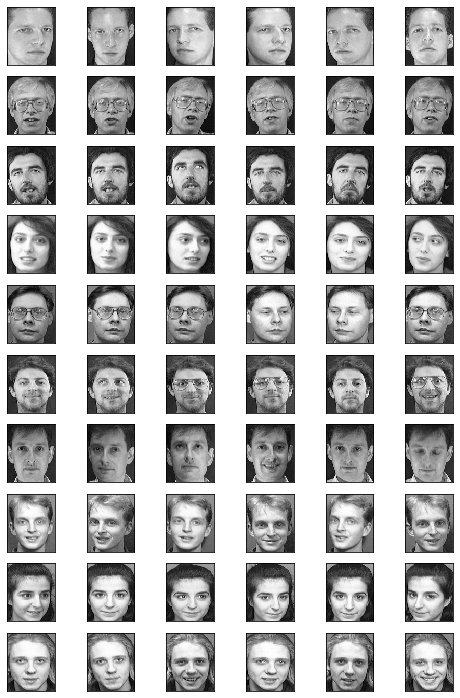

Images for testing :- 


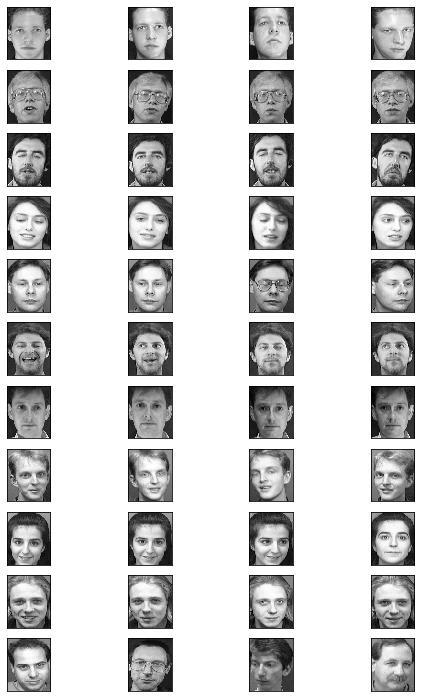

In [23]:
print('Images will be trained here')

path, dirs, files = next(os.walk(training_path))
testpath, test_dirs, test_files = next(os.walk(test_image_path))
# training images are stored in this array
training_array   = np.ndarray(shape=(len(files), height*width), dtype=np.float64)
print(len(files))
for i in range(len(files)):
    #The image object is read here and opened in a binary mode.
    img = plt.imread(training_path+''+str(i+1)+'.pgm')
    #copying images to the one dimensional training array
    training_array[i:]= np.array(img, dtype='float64').flatten()
    # The training images are plotted without change
    plotit(len(files)/6,6,1+i,'gray')
plt.show()

print('Images for testing :- ')
testing_array   = np.ndarray(shape=(len(test_files), height*width), dtype=np.float64)

for i in range(len(test_files)):
    #The image object is read here and opened in a binary mode.
    img = imread(test_image_path+''+str(i+1)+'.pgm')
    #copying images to the one dimensional testing array
    testing_array[i:] = np.array(img, dtype='float64').flatten()
    # The testing images are plotted without change
    plotit(len(test_files)/4,4,1+i,'gray')
plt.show()

# Calculating Mean of images

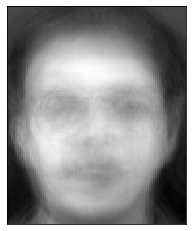

In [24]:
face_mean = np.zeros((1,height*width))
for i in training_array:
    face_mean = np.add(face_mean,i)

    
    
face_mean = np.divide(face_mean,float(len(training_array))).flatten()
plt.imshow(face_mean.reshape(height, width), cmap='gray')

plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

# Normalization of the Training Set

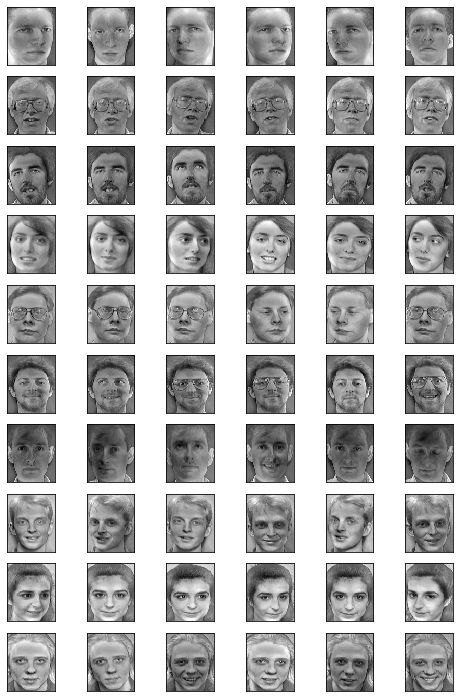

In [25]:
#normalized training set
normalisized_training_array = np.ndarray(shape=(len(training_array), height*width))

for i in range(len(training_array)):
    normalisized_training_array[i] = np.subtract(training_array[i],face_mean)

for i in range(len(training_array)):
    img = normalisized_training_array[i].reshape(height,width)
    plotit(10,6,1+i,'gray')
plt.show()

# Covariance Matrix Calculation

In [26]:
cov_matrix = np.cov(normalisized_training_array)
cov_matrix = np.divide(cov_matrix,float(len(training_array)))
print(cov_matrix)

[[25.76481507  5.67350101  2.36306105 ... -1.54762144 -0.0806879
  -5.17057477]
 [ 5.67350101 21.22452574  5.01228367 ...  0.69290791  3.43353284
   0.23688211]
 [ 2.36306105  5.01228367 33.29665458 ... -0.79807283 -0.24953619
   0.14335801]
 ...
 [-1.54762144  0.69290791 -0.79807283 ... 15.58735801  9.63566816
   7.62289475]
 [-0.0806879   3.43353284 -0.24953619 ...  9.63566816 23.14454622
   9.90017353]
 [-5.17057477  0.23688211  0.14335801 ...  7.62289475  9.90017353
  17.51264716]]


# Eigen Value and Eigen Vector Calculation

In [27]:
eigenvalues, eigenvectors, = linearAlgebra.eig(cov_matrix)
print('Eigenvectors of Cov(X):')
print(eigenvectors)
print('Eigenvalues of Cov(X):')
print(eigenvalues)

Eigenvectors of Cov(X):
[[-0.11087929 -0.12735341  0.05259685 ...  0.06926927 -0.08504926
   0.05812468]
 [-0.07400385 -0.11660662  0.08100784 ... -0.03772627 -0.11676205
   0.06014739]
 [-0.30016133 -0.00806803  0.06952452 ...  0.04124222  0.19558083
   0.00541669]
 ...
 [-0.01572257 -0.05069704 -0.15852558 ... -0.0980784   0.01096029
  -0.06969903]
 [-0.04377455 -0.08487151 -0.27911232 ...  0.30521278  0.20518712
  -0.01828838]
 [-0.03826044  0.01591202 -0.20874133 ... -0.08932438 -0.26022304
   0.21531682]]
Eigenvalues of Cov(X):
[1.94936942e+02 1.83426239e+02 1.27467436e+02 9.02001474e+01
 7.52481022e+01 6.60944204e+01 5.48416236e+01 4.09525069e+01
 3.80505933e+01 3.52524457e+01 2.68995007e+01 2.46518681e+01
 2.28584631e+01 2.12264205e+01 1.82257482e+01 1.69933892e+01
 1.65490640e+01 1.50588938e+01 1.45274145e+01 1.35569987e+01
 1.27375752e+01 1.67772268e-14 1.21306757e+01 1.13932568e+01
 1.08192434e+01 1.02624836e+01 9.76441921e+00 9.48066233e+00
 9.23408641e+00 1.86668541e+00 8.3

# Choice of K vector with respect to Eigen Vectors

Cumulative proportion of variance explained vector: [0.14517351 0.28177477 0.37670236 0.44387625 0.49991504 0.5491369
 0.58997858 0.62047674 0.64881379 0.67506701 0.69509961 0.71345836
 0.73048153 0.74628927 0.75986236 0.77251768 0.78484211 0.79605677
 0.80687563 0.81697181 0.82645774 0.8354917  0.84397649 0.8520338
 0.85967648 0.86694824 0.87400869 0.8808855  0.88714007 0.89307348
 0.89894425 0.90469649 0.91022256 0.91569832 0.92090483 0.9258425
 0.93062775 0.93508023 0.9394087  0.94348703 0.9475285  0.95145466
 0.95532275 0.95904408 0.96264284 0.96611356 0.96940091 0.97258469
 0.97573678 0.97878845 0.98170521 0.98458936 0.98725705 0.98976206
 0.99215485 0.99451981 0.99678146 0.99860984 1.         1.        ]


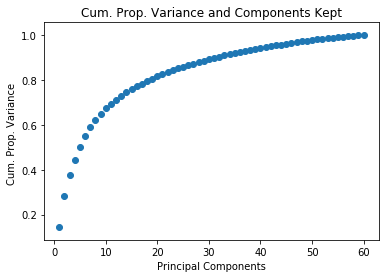

In [28]:
# get corresponding eigenvectors to eigen values
# so as to get the eigenvectors at the same corresponding index to eigen values when sorted
paired_eigen = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
paired_eigen.sort(reverse=True)
sort_eigvalues  = [paired_eigen[index][0] for index in range(len(eigenvalues))]
sort_eigvectors = [paired_eigen[index][1] for index in range(len(eigenvalues))]

# Find cumulative variance of each principle component
variance_of_PC = np.cumsum(sort_eigvalues)/sum(sort_eigvalues)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector:", variance_of_PC)

# x-axis for number of principal components kept
numberOfComp = range(1,len(sort_eigvalues)+1)
plt.title('Cum. Prop. Variance and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance ')

plt.scatter(numberOfComp, variance_of_PC)
plt.show()

# Transposing the matrix

In [29]:
print('Number of eigen vectors:',len(sort_eigvalues))

# Choosing the necessary number of principle components
number_chosen_components = 30
print("k:",number_chosen_components)
reduced_data = np.array(sort_eigvectors[:number_chosen_components]).transpose()

Number of eigen vectors: 60
k: 30


# Eigenfaces Calculation

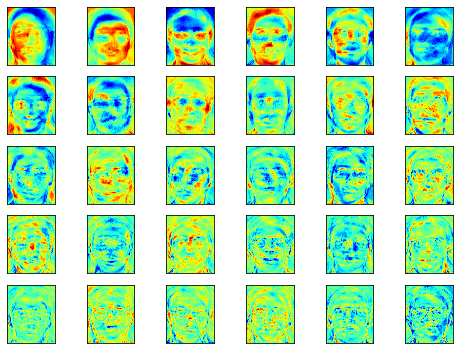

(30, 10304)

In [30]:
# get projected data ---> eigen space

proj_data = np.dot(training_array.transpose(),reduced_data)
proj_data = proj_data.transpose()

# plotting of eigen faces --> the information retained after applying lossing transformation
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plotit(10,6,1+i,'jet')
plt.show()

proj_data.shape

# Signature of Each Face

In [31]:
print(normalisized_training_array.shape)
print(proj_data.shape)

w = np.array([np.dot(proj_data,img) for img in normalisized_training_array])
w.shape

(60, 10304)
(30, 10304)


(60, 30)

# Testing of Images

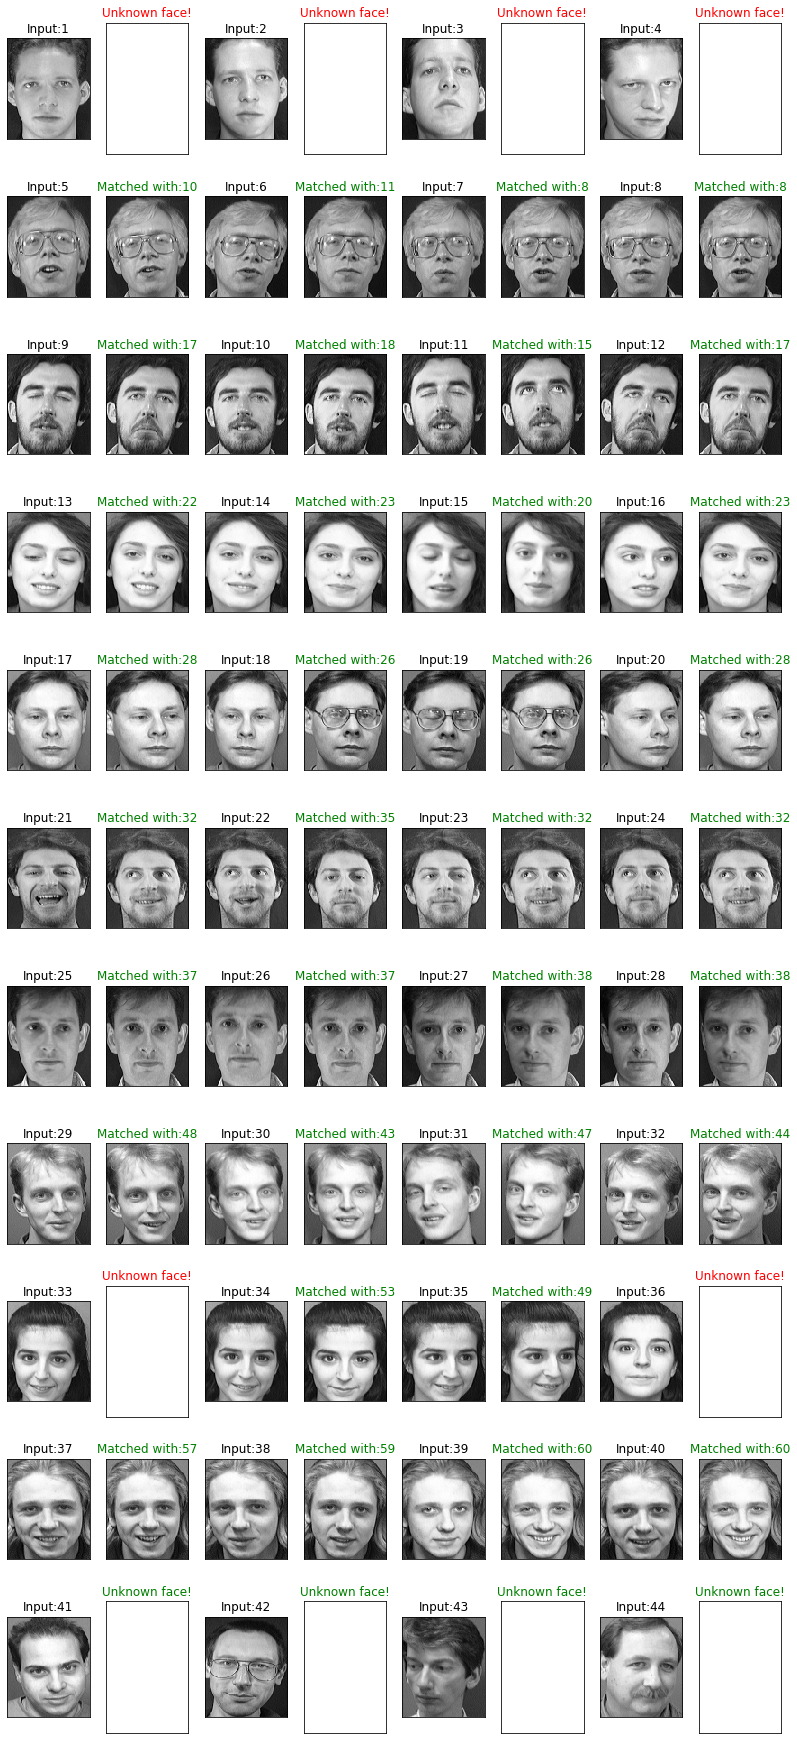

Correct predictions: 38/44 = 86.36363636363636%


In [32]:
# Testing all the images

count=0
num_images=0
correct_pred=0
def recogniser(img_number,proj_data,w):
    global count,highest_min,num_images,correct_pred
    
    num_images          += 1
    unknown_face_vector = testing_array[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,face_mean)
    
    plt.subplot(11,8,1+count)
    plt.imshow(unknown_face_vector.reshape(height,width), cmap='gray')
    plt.title('Input:'+str(img_number+1))
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector) # w_known --> projected test face
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    plt.subplot(11,8,1+count)
    
    set_number = int(img_number/4)


    t0 = 15000000
    
    if norms[index] < t0:
        if(index>=(6*set_number) and index<(6*(set_number+1))):
            plt.title('Matched with:'+str(index+1), color='g')
            plt.imshow(training_array[index,:].reshape(height,width), cmap='gray')
            correct_pred += 1
        else:
            plt.title('Matched with:'+str(index+1), color='r')
            plt.imshow(training_array[index,:].reshape(height,width), cmap='gray')
    else:
        if(img_number>=40):
            plt.title('Unknown face!', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face!', color='r')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1

fig = plt.figure(figsize=(10, 10))
for i in range(len(testing_array)):
    recogniser(i,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Plotting of Accuracy vs k-value for eigenvectors

Total Number of eigenvectors: 60


Text(0.5, 1.0, 'Accuracy vs. k-value')

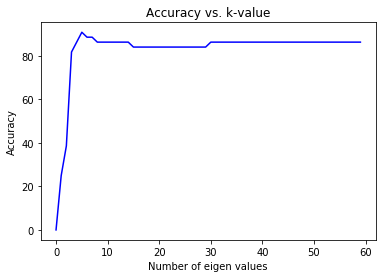

In [33]:
accuracy = np.zeros(len(sort_eigvalues))

def tester(img_number,proj_data,w,num_images,correct_pred):
    
    num_images          += 1
    unknown_face_vector = testing_array[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,face_mean)
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    set_number = int(img_number/4)

    t0 = 15000000
    
    if norms[index] < t0:
        if(index>=(6*set_number) and index<(6*(set_number+1))):
            correct_pred += 1
    else:
        if(img_number>=40):
            correct_pred += 1
    
    return num_images,correct_pred

def calculate(k):
    
#     print("k:",k)
    reduced_data = np.array(sort_eigvectors[:k]).transpose()
    
    proj_data = np.dot(training_array.transpose(),reduced_data)
    proj_data = proj_data.transpose()
    
    w = np.array([np.dot(proj_data,img) for img in normalisized_training_array])
    
    num_images=0
    correct_pred=0
    
    for i in range(len(testing_array)):
        num_images,correct_pred = tester(i,proj_data,w,num_images,correct_pred)
    
    accuracy[k] = correct_pred/num_images*100.00
    
print('Total Number of eigenvectors:',len(sort_eigvalues))
for i in range(1,len(sort_eigvalues)):
    calculate(i)
    
fig, axi = plt.subplots()  
axi.plot(np.arange(len(sort_eigvalues)), accuracy, 'b')  
axi.set_xlabel('Number of eigen values')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. k-value') 